# EDA Fitur

>>> Memuat semua file fitur...
Bentuk Audio : (802, 20)
Bentuk Visual: (802, 2048)
Bentuk Teks  : (802, 768)

>>> Menggabungkan semua fitur...
Bentuk Fitur Gabungan: (802, 2836)

>>> Statistik Deskriptif Fitur:
      count        mean        std         min         25%         50%  \
0     802.0 -189.986339  59.331655 -396.340790 -222.682789 -192.144417   
1     802.0  117.327223  29.545704    0.000000  107.721901  120.933376   
2     802.0   -7.529386  16.391613 -103.218376  -17.654687   -7.138979   
3     802.0   18.405024  10.724769  -24.905922   11.058226   18.968885   
4     802.0   -0.741063   8.685666  -30.468468   -6.271543   -0.277735   
...     ...         ...        ...         ...         ...         ...   
2831  802.0    1.534769   0.591062    0.000000    1.193564    1.534373   
2832  802.0   -0.208966   0.378901   -1.443792   -0.453939   -0.189698   
2833  802.0   -0.645683   0.626368   -2.396012   -1.127198   -0.671150   
2834  802.0   -0.656922   0.498450   -1.915411   

C:\Users\kn409\AppData\Local\Temp\ipykernel_30740\3288641549.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=df_features, order=df_features['label'].value_counts().index, palette="viridis")


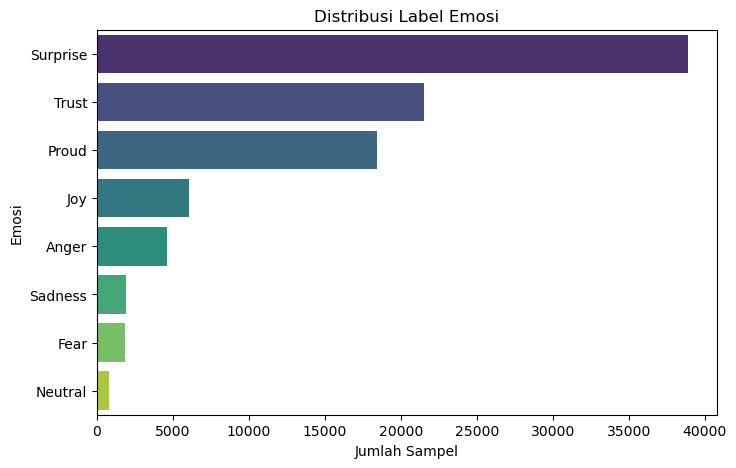


>>> Matriks Korelasi (10 fitur pertama):
          0         1         2         3         4         5         6  \
0  1.000000 -0.542448  0.027132 -0.161416 -0.026759  0.218659  0.051222   
1 -0.542448  1.000000 -0.142437  0.253141 -0.019981 -0.116978 -0.132536   
2  0.027132 -0.142437  1.000000  0.026989  0.222212  0.397957 -0.073629   
3 -0.161416  0.253141  0.026989  1.000000  0.360838  0.310672  0.297434   
4 -0.026759 -0.019981  0.222212  0.360838  1.000000  0.298396  0.353411   
5  0.218659 -0.116978  0.397957  0.310672  0.298396  1.000000  0.135144   
6  0.051222 -0.132536 -0.073629  0.297434  0.353411  0.135144  1.000000   
7  0.285618 -0.072473  0.305538  0.144296  0.327087  0.506905  0.145682   
8  0.075084 -0.133631 -0.057200  0.175759  0.232938  0.429427  0.455396   
9  0.307445 -0.073239  0.199056  0.065933  0.093166  0.229672  0.306956   

          7         8         9  
0  0.285618  0.075084  0.307445  
1 -0.072473 -0.133631 -0.073239  
2  0.305538 -0.057200  0.19905

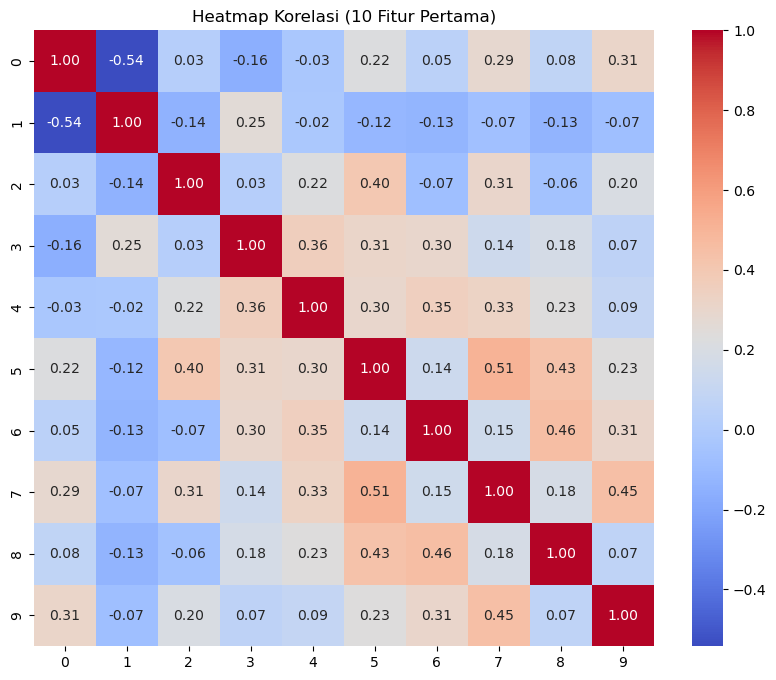


>>> Menormalisasi fitur gabungan...

>>> Menjalankan t-SNE... (butuh waktu)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 802 samples in 0.000s...
[t-SNE] Computed neighbors for 802 samples in 0.102s...
[t-SNE] Computed conditional probabilities for sample 802 / 802
[t-SNE] Mean sigma: 18.179242


c:\Users\kn409\anaconda3\envs\satria_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.590378
[t-SNE] KL divergence after 300 iterations: 1.215917


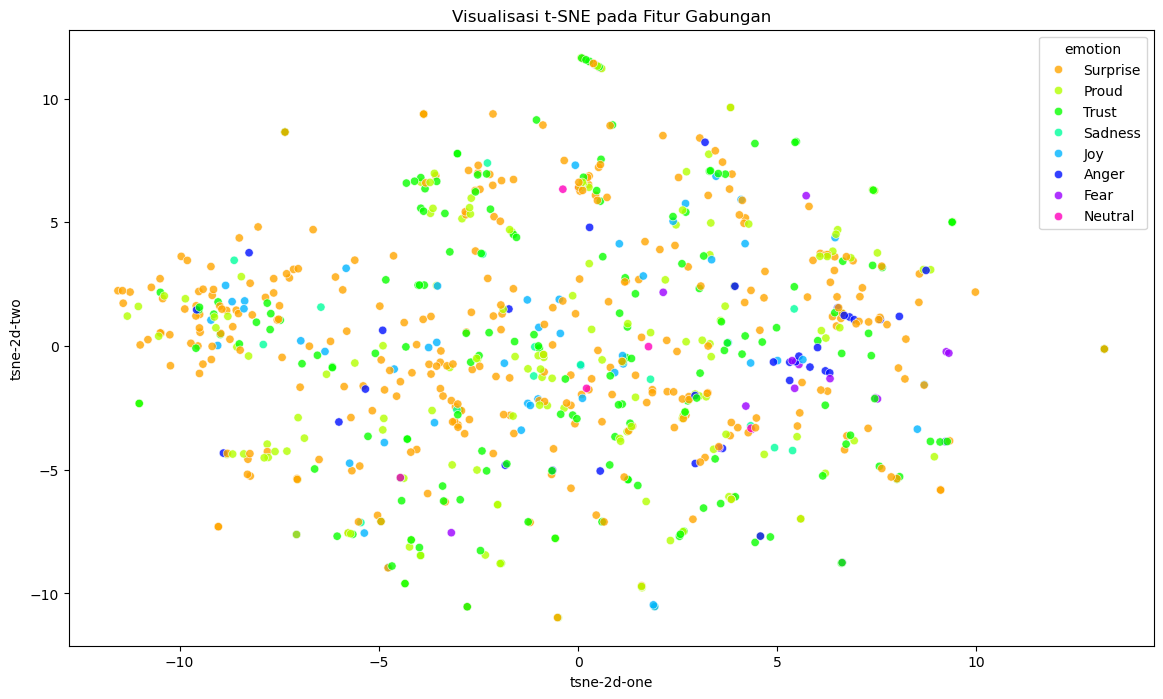


>>> INSIGHT OTOMATIS:
- Dataset punya total sampel: 802
- Jumlah fitur (audio+visual+text): 2836
- Label paling banyak muncul: Surprise
- Jumlah unik label (kelas emosi): 8


In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# 1. LOAD FITUR & LABEL
BASE_DIR = Path.cwd().parent
FEATURES_DIR = BASE_DIR / "features"

print(">>> Memuat semua file fitur...")
audio_features = np.load(FEATURES_DIR / "audio_train.npy")
visual_features = np.load(FEATURES_DIR / "visual_train.npy")
text_features = np.load(FEATURES_DIR / "text_train.npy")
labels = np.load(FEATURES_DIR / "audio_labels_train.npy")

print(f"Bentuk Audio : {audio_features.shape}")
print(f"Bentuk Visual: {visual_features.shape}")
print(f"Bentuk Teks  : {text_features.shape}")

# 2. GABUNGKAN SEMUA FITUR
print("\n>>> Menggabungkan semua fitur...")
combined_features = np.concatenate([audio_features, visual_features, text_features], axis=1)
print(f"Bentuk Fitur Gabungan: {combined_features.shape}")

# Bikin DataFrame biar gampang eksplorasi
df_features = pd.DataFrame(combined_features)

# Mapping label -> emosi
emotion_map = {
    0: 'Proud', 1: 'Trust', 2: 'Joy', 3: 'Surprise',
    4: 'Neutral', 5: 'Sadness', 6: 'Fear', 7: 'Anger'
}
df_features['label'] = pd.Series(labels).map(emotion_map)

# 3. STATISTIK DESKRIPTIF
print("\n>>> Statistik Deskriptif Fitur:")
print(df_features.drop(columns='label').describe().T)

print("\n>>> Distribusi Label (Jumlah Sampel per Emosi):")
print(df_features['label'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(y='label', data=df_features, order=df_features['label'].value_counts().index, palette="viridis")
plt.title("Distribusi Label Emosi")
plt.xlabel("Jumlah Sampel")
plt.ylabel("Emosi")
plt.show()

# 4. KORELASI ANTAR FITUR (hanya untuk sebagian fitur biar ga berat)
print("\n>>> Matriks Korelasi (10 fitur pertama):")
sample_corr = df_features.iloc[:, :10].corr()
print(sample_corr)

plt.figure(figsize=(10, 8))
sns.heatmap(sample_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi (10 Fitur Pertama)")
plt.show()

# 5. NORMALISASI + t-SNE
print("\n>>> Menormalisasi fitur gabungan...")
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_features)

print("\n>>> Menjalankan t-SNE... (butuh waktu)")
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

df_tsne = pd.DataFrame(tsne_results, columns=['tsne-2d-one', 'tsne-2d-two'])
df_tsne['emotion'] = df_features['label']

plt.figure(figsize=(14, 8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="emotion",
    palette=sns.color_palette("hsv", 8),
    data=df_tsne,
    legend="full",
    alpha=0.8
)
plt.title("Visualisasi t-SNE pada Fitur Gabungan")
plt.show()

# 6. INSIGHT TEKS
print("\n>>> INSIGHT OTOMATIS:")
print("- Dataset punya total sampel:", df_features.shape[0])
print("- Jumlah fitur (audio+visual+text):", df_features.shape[1]-1)
print("- Label paling banyak muncul:", df_features['label'].mode()[0])
print("- Jumlah unik label (kelas emosi):", df_features['label'].nunique())


### Ringkasan Ekstraksi & Analisis Fitur

**1. Data Fitur**

* Audio: `(802, 20)`
* Visual: `(802, 2048)`
* Teks: `(802, 768)`
* **Gabungan Fitur**: `(802, 2836)`

**2. Statistik Deskriptif (Fitur Gabungan)**

* Total sampel: **802**
* Total dimensi fitur: **2836**
* Contoh statistik:

  * Mean ≈ -190 s/d 117
  * Std. dev. bervariasi, beberapa fitur tinggi (misal >50)
  * Rentang nilai cukup lebar (min -396 s/d max 178 pada sebagian fitur)

**3. Distribusi Label (Imbalanced Dataset)**

* Surprise: 331
* Trust: 184
* Proud: 156
* Joy: 53
* Anger: 36
* Sadness: 18
* Fear: 16
* Neutral: 8

**4. Korelasi Fitur (10 Fitur Pertama)**

* Beberapa fitur punya korelasi kuat, contoh:

  * Fitur 5 & 7: **0.51**
  * Fitur 5 & 8: **0.43**
  * Fitur 6 & 8: **0.46**
* Ada juga fitur negatif terhubung, contoh:

  * Fitur 0 & 1: **-0.54**

**5. Normalisasi & Visualisasi (t-SNE)**

* Fitur gabungan dinormalisasi sebelum reduksi dimensi.
* Hasil **t-SNE** memperlihatkan sebaran kelas emosi masih cukup tumpang tindih, cluster antar emosi belum terpisah jelas.

**6. Insight Otomatis**

* Dataset punya **802 sampel** dengan **2836 fitur gabungan**.
* **Label paling dominan**: *Surprise*.
* Total kelas emosi: **8**.